# Subreddit EDA

In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('../Data/subredditdata.csv')

In [46]:
df.head()

,title,selftext,subreddit,created_utc
0,Do the crazy customers realize that they becom...,[removed],TalesFromRetail,1636729943
1,Store music volume controls,"My most recent job, and hopefully last, in ret...",TalesFromRetail,1636729678
2,Ways of Rejection,I'll just hop right into it as there's no poin...,TalesFromRetail,1636725427
3,JUST TELL US WHAT IT'S USED FOR!,[removed],TalesFromRetail,1636694714
4,You've got to go collect stray shopping carts ...,[removed],TalesFromRetail,1636679308


### Dropping NaN from data set

In [47]:
df.isnull().sum()

title           0
selftext       65
subreddit       0
created_utc     0
dtype: int64

In [48]:
df[df['selftext'].isnull()].value_counts(df['subreddit']) # of rows for each with blank self texts

subreddit
TalesFromRetail         41
talesfromtechsupport    24
dtype: int64

In [49]:
df = df.dropna() # all 65 na rows are dropped now

In [50]:
df['subreddit'].value_counts()

talesfromtechsupport    1470
TalesFromRetail         1459
Name: subreddit, dtype: int64

In [51]:
df['subreddit'].value_counts(normalize=True) # distribution still almost 50/50

talesfromtechsupport    0.501878
TalesFromRetail         0.498122
Name: subreddit, dtype: float64

### Checking the dtypes and setting subreddit column to binary

In [52]:
df.dtypes

title          object
selftext       object
subreddit      object
created_utc     int64
dtype: object

### TalesFromRetail = 0, TalesFromTechSupport = 1

In [53]:
df['subreddit'] = df['subreddit'].map({'TalesFromRetail': 0, 'talesfromtechsupport': 1})

In [54]:
df.head(2)

,title,selftext,subreddit,created_utc
0,Do the crazy customers realize that they becom...,[removed],0,1636729943
1,Store music volume controls,"My most recent job, and hopefully last, in ret...",0,1636729678


### Furthur Exploration

In [55]:
df['selftext'].value_counts() # 1503 of selftext is removed, may add them as a stopword

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Going to change [removed] to just removed_asdf_fix in our DF

In [56]:
def selftext_fix(self_cell):
    if self_cell == '[removed]':
        return 'removed_asdf_fix' # setting as this string since I don't want an accidental replace on something else
    else:
        return self_cell

In [57]:
df['selftext'] = df['selftext'].map(selftext_fix)

In [58]:
df.head()

,title,selftext,subreddit,created_utc
0,Do the crazy customers realize that they becom...,removed_asdf_fix,0,1636729943
1,Store music volume controls,"My most recent job, and hopefully last, in ret...",0,1636729678
2,Ways of Rejection,I'll just hop right into it as there's no poin...,0,1636725427
3,JUST TELL US WHAT IT'S USED FOR!,removed_asdf_fix,0,1636694714
4,You've got to go collect stray shopping carts ...,removed_asdf_fix,0,1636679308


In [59]:
df.groupby('subreddit').nunique()

,title,selftext,created_utc
subreddit,,,
0,1428,550,1459
1,1453,866,1469


In [60]:
#df.to_csv('../Data/subredditdatacleaned.csv') <- already ran and happpy with output

# Tokenizer/Porter Stemming Words

In [61]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [63]:
word_tokenize(df['title'][0]) # <- Test on first title

['Do',
 'the',
 'crazy',
 'customers',
 'realize',
 'that',
 'they',
 'become',
 'a',
 'joke',
 'after',
 'they',
 'leave',
 '?']

In [71]:
p_stemmer = PorterStemmer()

In [75]:
def stem_sentence(cell):
    tokens = cell.split()
    stemmed_tokens = [p_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['title'] = df['title'].map(stem_sentence)
df['selftext'] = df['selftext'].map(stem_sentence)

# Inspiration https://stackoverflow.com/questions/43795310/apply-porters-stemmer-to-a-pandas-column-for-each-word

# Count Vecotirizing into seperate DataFrames title/selftext

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('removed_asdf_fix')

In [91]:
cvec1 = CountVectorizer(stop_words=stopwords)

In [92]:
cvec1.fit(df['title'])

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [93]:
title_cvec = cvec1.transform(df['title'])

In [83]:
title_cvec.shape

(2929, 3518)

In [98]:
title_df = pd.DataFrame(title_cvec.todense(), columns=cvec1.get_feature_names())

In [122]:
title_df.shape

(2929, 3518)

In [123]:
title_df['which_subreddit'] = df['subreddit']

In [124]:
title_df.shape

(2929, 3519)

In [127]:
title_df.sum().sort_values(ascending=False).head(15)

which_subreddit    1406.0
custom              244.0
work                147.0
thi                 105.0
get                  95.0
want                 94.0
call                 83.0
job                  81.0
support              76.0
tech                 73.0
time                 73.0
whi                  72.0
one                  68.0
wa                   67.0
store                65.0
dtype: float64

In [101]:
import matplotlib.pyplot as plt

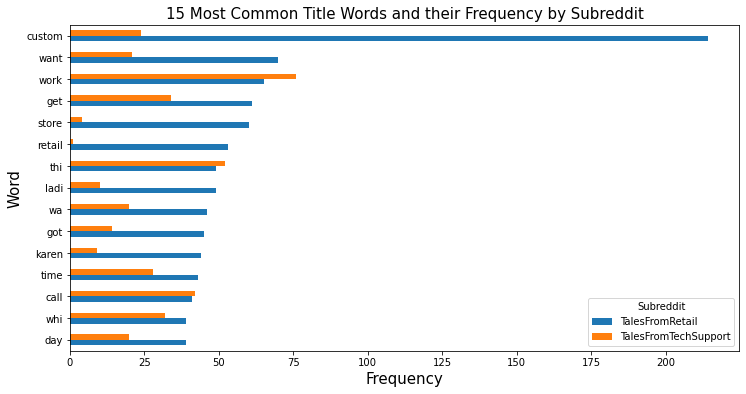

In [153]:
ax = title_df.groupby('which_subreddit').sum().T.sort_values(0, ascending=False).head(15).sort_values(0).plot(kind='barh', figsize=(12,6))
plt.title('15 Most Common Title Words and their Frequency by Subreddit', size=15)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("TalesFromRetail","TalesFromTechSupport"))
#plt.savefig('../Visuals/titlesortedretail.png', bbox_inches='tight');
plt.show();

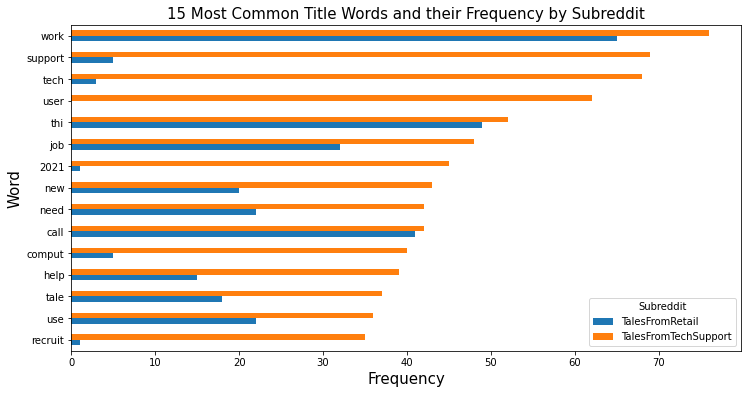

In [152]:
ax = title_df.groupby('which_subreddit').sum().T.sort_values(1, ascending=False).head(15).sort_values(1).plot(kind='barh', figsize=(12,6))
plt.title('15 Most Common Title Words and their Frequency by Subreddit', size=15)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("TalesFromRetail","TalesFromTechSupport"))
#plt.savefig('../Visuals/titlesortedtech.png', bbox_inches='tight');
plt.show();

In [95]:
cvec2 = CountVectorizer(stop_words=stopwords)

In [96]:
cvec2.fit(df['selftext'])

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

## Same process for selftext

In [97]:
selftext_cvec = cvec2.transform(df['selftext'])

In [103]:
selftext_df = pd.DataFrame(selftext_cvec.todense(), columns=cvec2.get_feature_names())

In [114]:
selftext_df['which_subreddit'] = df['subreddit']

In [115]:
selftext_df.shape

(2929, 15488)

In [128]:
selftext_df.sum().sort_values(ascending=False).head(15)

wa                  6901.0
thi                 4784.0
work                2656.0
get                 2600.0
one                 2551.0
call                1904.0
back                1777.0
hi                  1766.0
go                  1747.0
time                1697.0
ask                 1545.0
like                1515.0
know                1417.0
which_subreddit     1406.0
subredditasdf123    1406.0
dtype: float64

In [117]:
selftext_df.groupby('which_subreddit').sum().T.sort_values(0, ascending=False)

which_subreddit,0.0,1.0
wa,2658.0,4100.0
thi,1686.0,2990.0
store,1084.0,134.0
one,924.0,1570.0
get,910.0,1644.0
...,...,...
leading,0.0,0.0
leaf,0.0,1.0
leaflet,0.0,1.0
learned,0.0,2.0


In [ ]:
selftext_df.drop(columns=['subredditasdf123'], inplace=True)

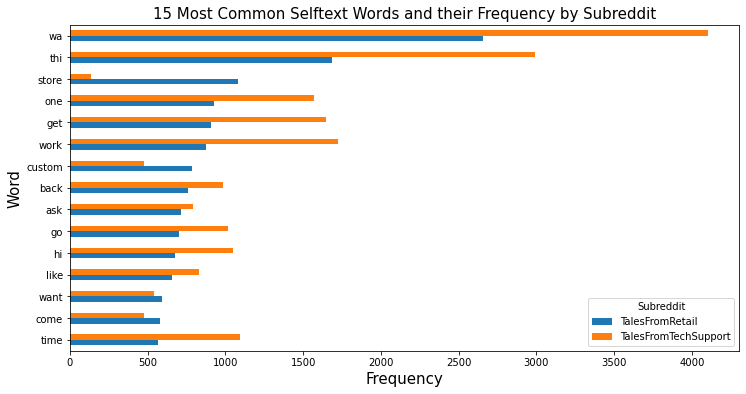

In [151]:
ax = selftext_df.groupby('which_subreddit').sum().T.sort_values(0, ascending=False).head(15).sort_values(0).plot(kind='barh', figsize=(12,6))
plt.title('15 Most Common Selftext Words and their Frequency by Subreddit', size=15)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("TalesFromRetail","TalesFromTechSupport"))
#plt.savefig('../Visuals/selftextsortedretail.png', bbox_inches='tight');
plt.show();

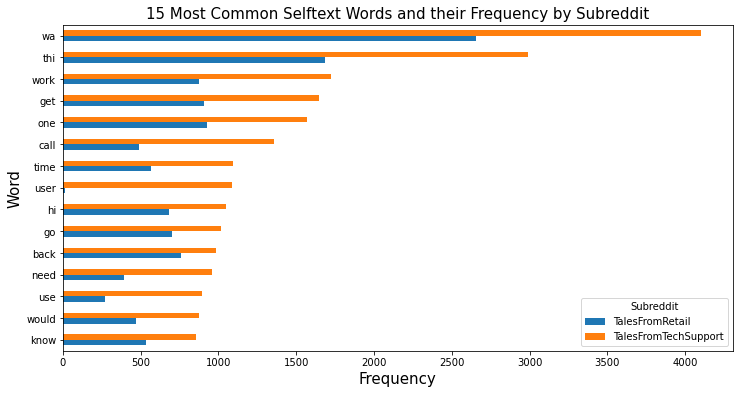

In [150]:
ax = selftext_df.groupby('which_subreddit').sum().T.sort_values(1, ascending=False).head(15).sort_values(1).plot(kind='barh', figsize=(12,6))
plt.title('15 Most Common Selftext Words and their Frequency by Subreddit', size=15)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("TalesFromRetail","TalesFromTechSupport"))
#plt.savefig('../Visuals/selftextsortedtech.png', bbox_inches='tight');
plt.show()